## Ridge and Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')



In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


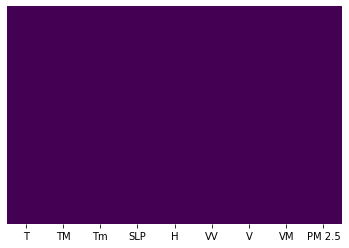

In [4]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:

X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
719,False,False,False,False,False,False,False,False
720,False,False,False,False,False,False,False,False
721,False,False,False,False,False,False,False,False
722,False,False,False,False,False,False,False,False


In [8]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
719    False
720    False
721    False
722    False
723    False
Name: PM 2.5, Length: 723, dtype: bool

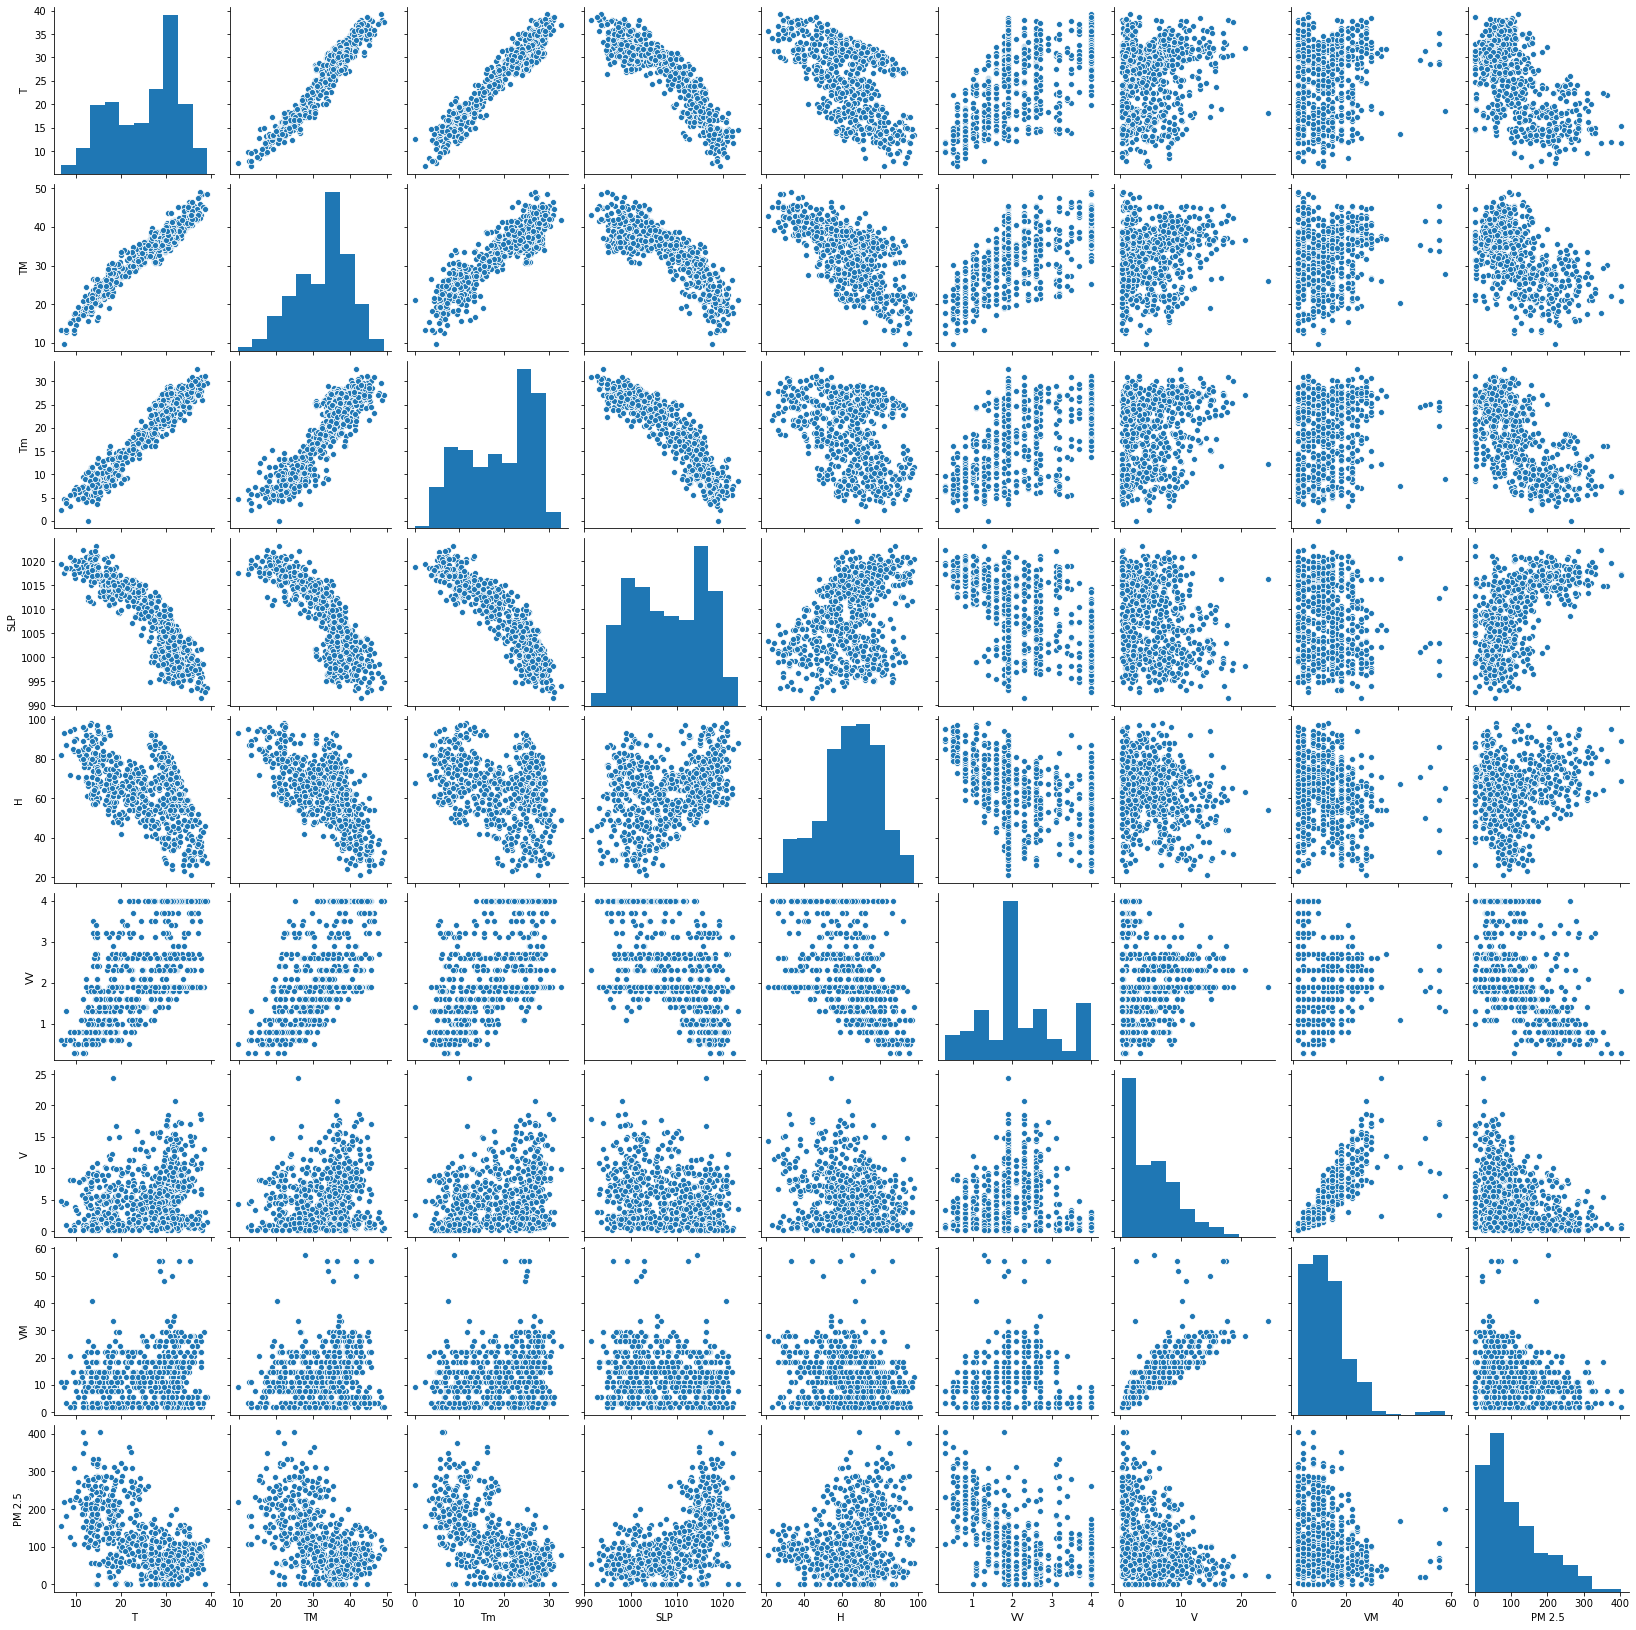

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.962046,0.960562,-0.900830,-0.547844,0.531975,0.227187,0.164489,-0.626785
TM,0.962046,1.000000,0.882490,-0.838453,-0.643086,0.576000,0.173272,0.120056,-0.550984
Tm,0.960562,0.882490,1.000000,-0.912126,-0.355187,0.434296,0.269996,0.201158,-0.673735
SLP,-0.900830,-0.838453,-0.912126,1.000000,0.340243,-0.423859,-0.262291,-0.192608,0.611264
H,-0.547844,-0.643086,-0.355187,0.340243,1.000000,-0.455955,-0.228151,-0.182609,0.182983
VV,0.531975,0.576000,0.434296,-0.423859,-0.455955,1.000000,-0.135399,-0.222236,-0.487422
V,0.227187,0.173272,0.269996,-0.262291,-0.228151,-0.135399,1.000000,0.827496,-0.333484
VM,0.164489,0.120056,0.201158,-0.192608,-0.182609,-0.222236,0.827496,1.000000,-0.249867
PM 2.5,-0.626785,-0.550984,-0.673735,0.611264,0.182983,-0.487422,-0.333484,-0.249867,1.000000


### Correlation Matrix with Heatmap


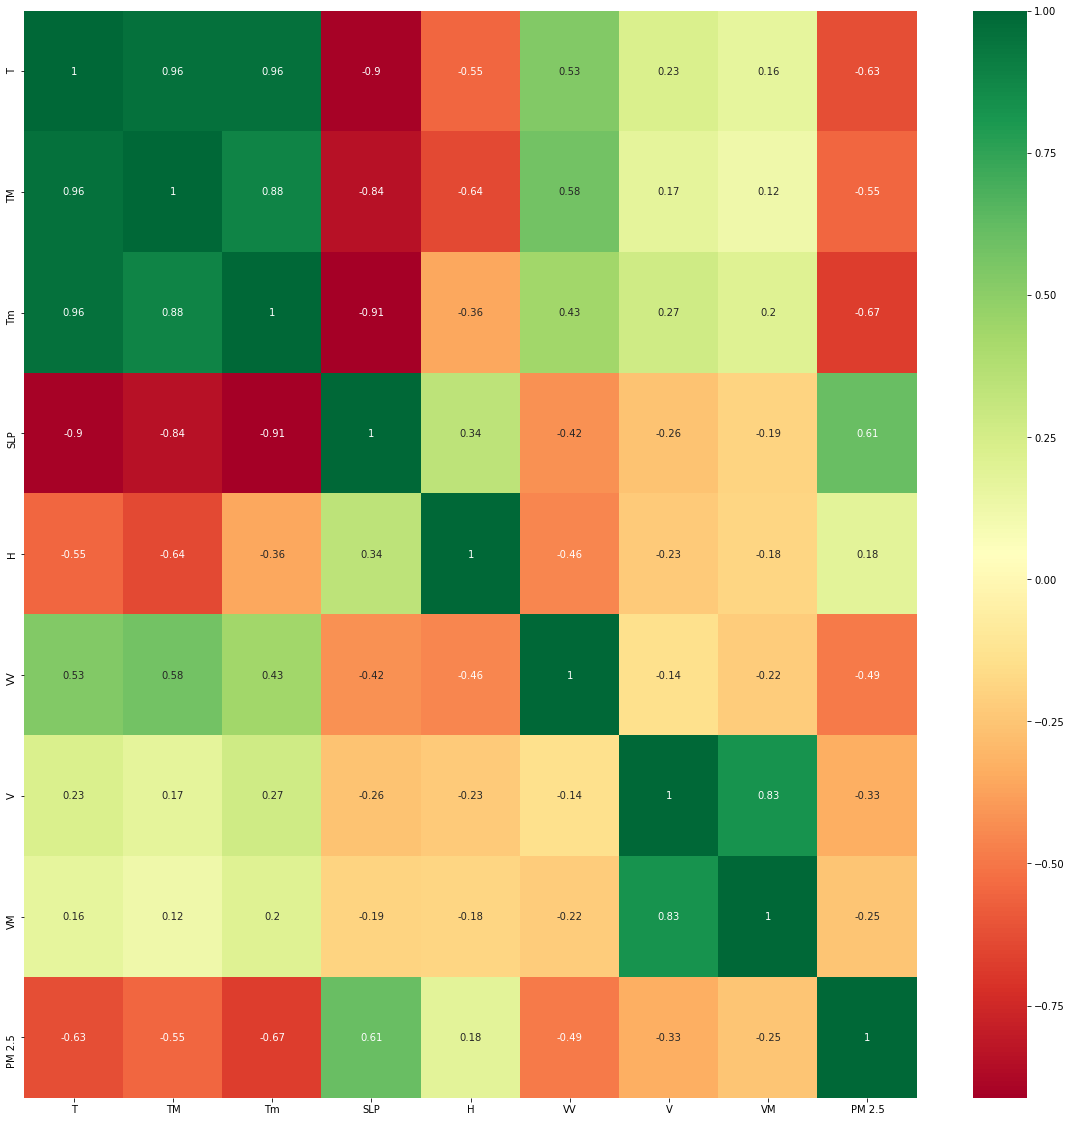

In [11]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [15]:
print(model.feature_importances_)

[0.18702243 0.0677357  0.19103627 0.13553253 0.07460914 0.2375163
 0.05869903 0.0478486 ]


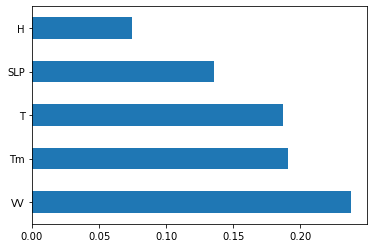

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

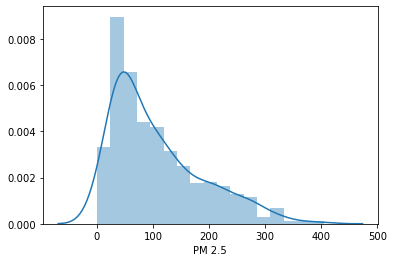

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Comparison Linear, Ridge and Lasso Regression

## Linear Regression

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [35]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='r2',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

0.44122960083977547


## Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [47]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='r2')

In [46]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
0.5059469564935559


## Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [39]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809301.9033239088, tolerance: 410.1189379759378
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687652.7783177239, tolerance: 369.5666517910569
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791128.8257784905, tolerance: 394.67715060281205
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

{'alpha': 10}
0.5170610418234773


#### Model Evaluation

In [48]:
prediction=lasso_regressor.predict(X_test)

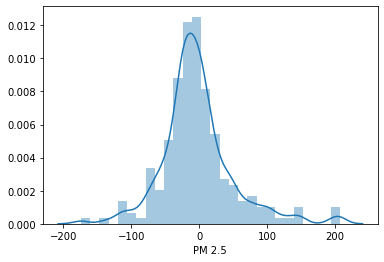

In [49]:
sns.distplot(y_test-prediction)

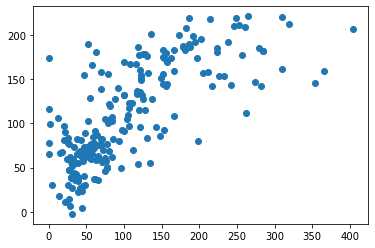

In [50]:
plt.scatter(y_test,prediction)

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 37.436295190832105
MSE: 2887.8025946706794
RMSE: 53.73827867238287
